In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('credit_risk_dataset.csv')
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


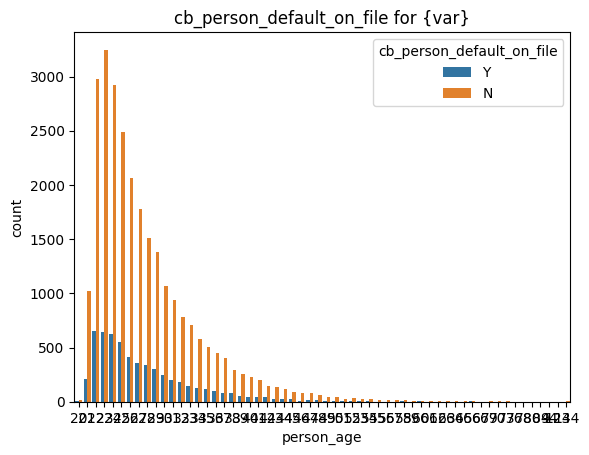

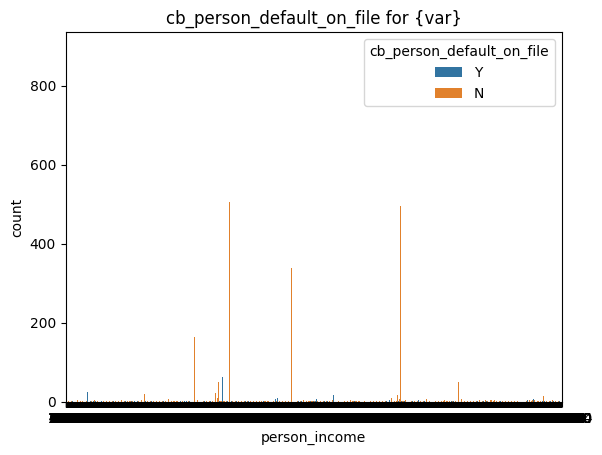

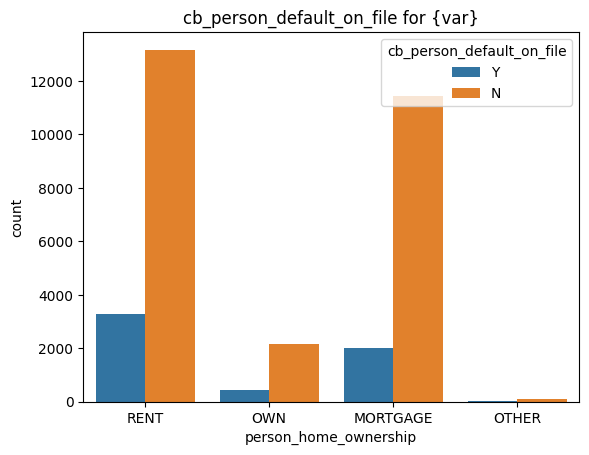

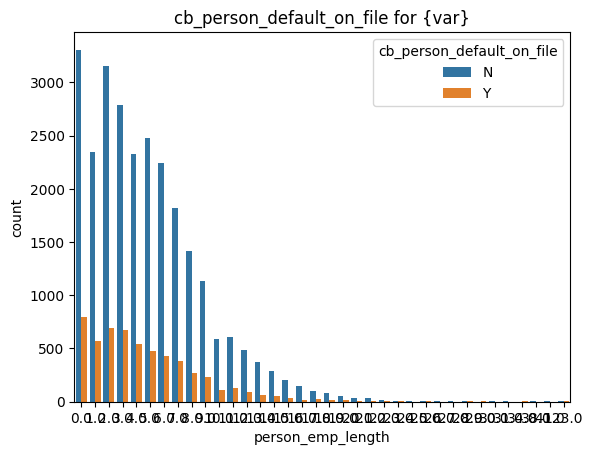

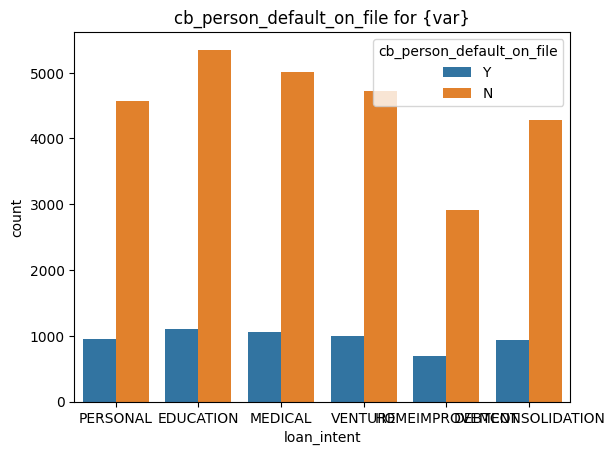

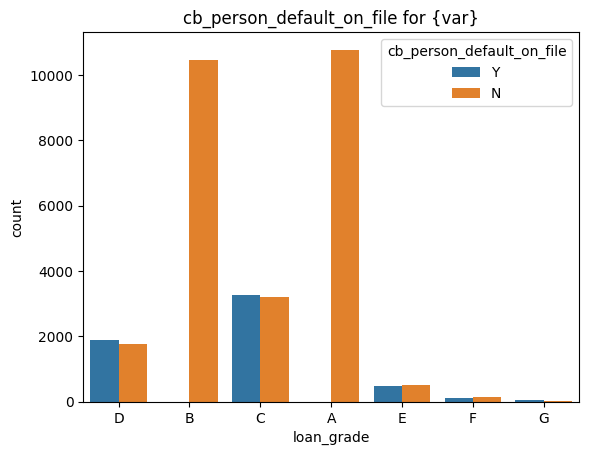

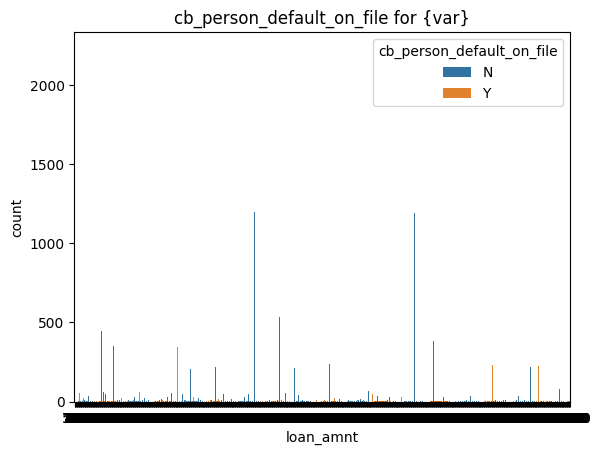

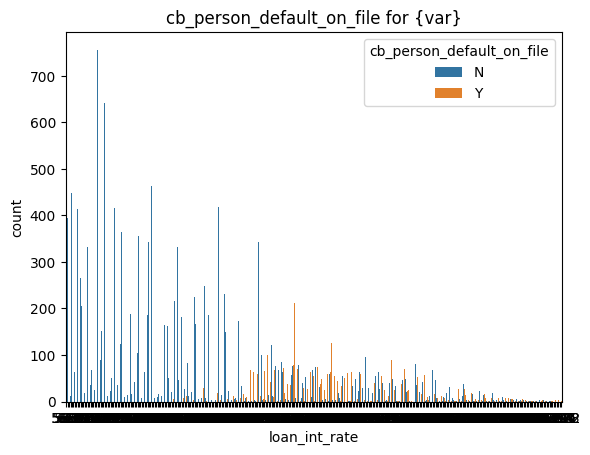

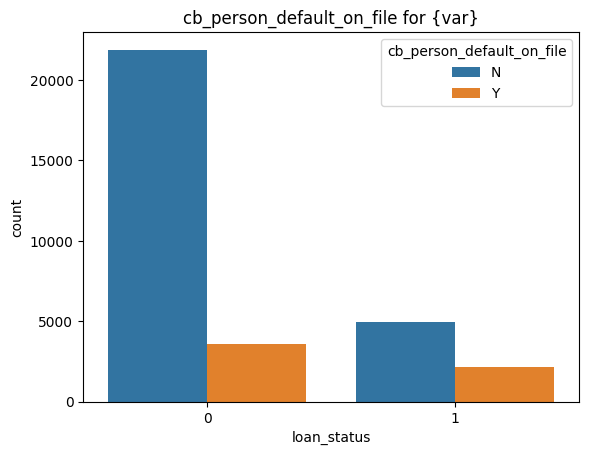

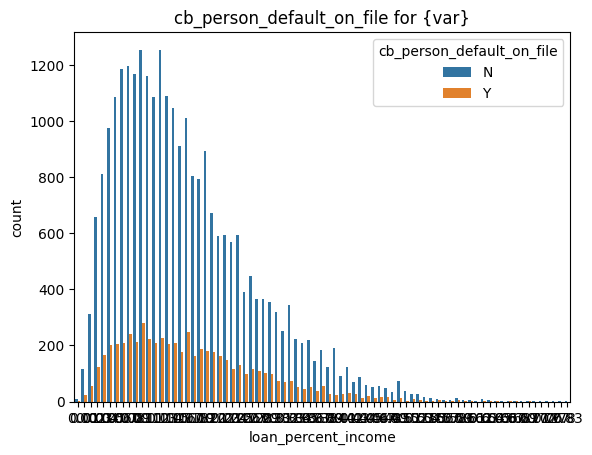

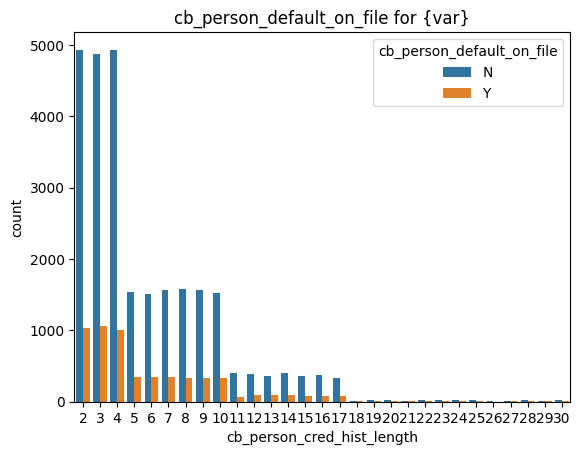

In [4]:
vars = ['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']

for var in vars:
    sns.countplot(x = df[var],hue=df['cb_person_default_on_file'])
    plt.title('cb_person_default_on_file for {var}')
    plt.show()

In [5]:
for var in vars:
    ratios = df.groupby(var)['cb_person_default_on_file'].value_counts(normalize=True).unstack()
    print(ratios)

cb_person_default_on_file         N         Y
person_age                                   
20                         0.800000  0.200000
21                         0.828316  0.171684
22                         0.819983  0.180017
23                         0.835176  0.164824
24                         0.824739  0.175261
25                         0.819888  0.180112
26                         0.831651  0.168349
27                         0.833022  0.166978
28                         0.815534  0.184466
29                         0.819206  0.180794
30                         0.813070  0.186930
31                         0.820490  0.179510
32                         0.815353  0.184647
33                         0.825935  0.174065
34                         0.820874  0.179126
35                         0.812903  0.187097
36                         0.813869  0.186131
37                         0.834728  0.165272
38                         0.788204  0.211796
39                         0.83443

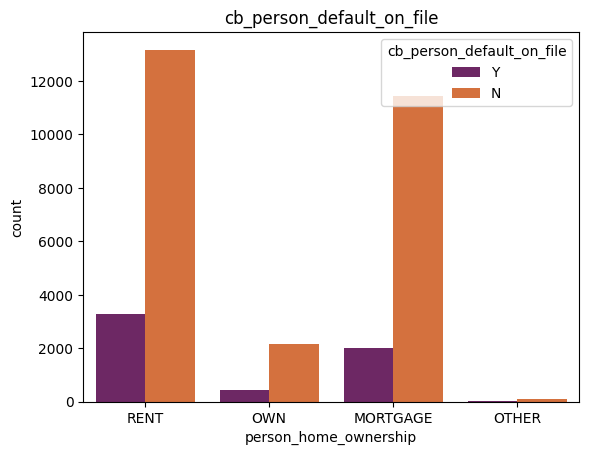

cb_person_default_on_file         N         Y
person_home_ownership                        
MORTGAGE                   0.851681  0.148319
OWN                        0.828173  0.171827
RENT                       0.800681  0.199319
OTHER                      0.728972  0.271028


In [6]:
sns.countplot(x = df['person_home_ownership'],hue=df['cb_person_default_on_file'],palette='inferno')
plt.title('cb_person_default_on_file')
plt.show()
ratios = df.groupby('person_home_ownership')['cb_person_default_on_file'].value_counts(normalize=True).unstack().sort_values(by='Y', ascending=True)
print(ratios)

In [7]:
ownership_mapping = {'OTHER': 3, 'RENT': 2, 'OWN': 1, 'MORTGAGE': 0}
intent_mapping = {'EDUCATION': 5,'VENTURE': 4, 'PERSONAL': 3, 'MEDICAL': 2, 'DEBTCONSOLIDATION': 1, 'HOMEIMPROVEMENT': 0}
grade_mapping = {'G': 6, 'F': 5, 'E': 4, 'D': 3, 'C': 2, 'B': 1, 'A': 0}

In [8]:
df['person_home_ownership'] = df['person_home_ownership'].map(ownership_mapping)
df['loan_intent'] = df['loan_intent'].map(intent_mapping)
df['loan_grade'] = df['loan_grade'].map(grade_mapping)


df['cb_person_default_on_file'] = df['cb_person_default_on_file'].apply(
    lambda x: 1 if x=='Y' else 0
)

In [9]:
df.corr()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
person_age,1.000000,0.173202,-0.033379,0.163106,-0.089184,0.014218,0.050787,0.012580,-0.021629,-0.042411,0.005807,0.859133
person_income,0.173202,1.000000,-0.197299,0.134268,-0.024044,-0.001022,0.266820,0.000792,-0.144449,-0.254471,-0.003613,0.117987
person_home_ownership,-0.033379,-0.197299,1.000000,-0.235264,0.018104,0.124048,-0.125891,0.143594,0.221992,0.138344,0.065039,-0.026798
person_emp_length,0.163106,0.134268,-0.235264,1.000000,-0.031255,-0.047276,0.113082,-0.056405,-0.082489,-0.054111,-0.027728,0.144699
loan_intent,-0.089184,-0.024044,0.018104,-0.031255,1.000000,-0.024163,-0.022979,-0.018476,-0.110887,0.005001,-0.014291,-0.073557
loan_grade,0.014218,-0.001022,0.124048,-0.047276,-0.024163,1.000000,0.145799,0.933684,0.373080,0.123021,0.537054,0.015069
loan_amnt,0.050787,0.266820,-0.125891,0.113082,-0.022979,0.145799,1.000000,0.146813,0.105376,0.572612,0.039081,0.041967
loan_int_rate,0.012580,0.000792,0.143594,-0.056405,-0.018476,0.933684,0.146813,1.000000,0.335133,0.120314,0.501072,0.016696
loan_status,-0.021629,-0.144449,0.221992,-0.082489,-0.110887,0.373080,0.105376,0.335133,1.000000,0.379366,0.179141,-0.015529
loan_percent_income,-0.042411,-0.254471,0.138344,-0.054111,0.005001,0.123021,0.572612,0.120314,0.379366,1.000000,0.035910,-0.031690


Phase entrainement de modèles:

In [10]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler

In [11]:
X = df[['person_age','person_income','person_home_ownership','person_emp_length','loan_intent','loan_grade',
       'loan_amnt','loan_int_rate','loan_status','loan_percent_income','cb_person_cred_hist_length']]

y = df['cb_person_default_on_file']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]

X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]

OLS

In [13]:
model= sm.OLS(y_train, X_train).fit(cov_type='HC3')
df['OLS_predicted'] = model.predict(X_train)

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     cb_person_default_on_file   R-squared:                       0.293
Model:                                   OLS   Adj. R-squared:                  0.293
Method:                        Least Squares   F-statistic:                     546.5
Date:                       Wed, 12 Jun 2024   Prob (F-statistic):               0.00
Time:                               14:03:53   Log-Likelihood:                -6583.6
No. Observations:                      22886   AIC:                         1.319e+04
Df Residuals:                          22874   BIC:                         1.329e+04
Df Model:                                 11                                         
Covariance Type:                         HC3                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0063      0.022     -0.293      0.770      -0.048       0.036
person_age                    -0.0003      0.001     -0.411      0.681      -0.002       0.001
person_income               1.563e-08   7.23e-08      0.216      0.829   -1.26e-07    1.57e-07
person_home_ownership         -0.0002      0.002     -0.089      0.929      -0.005       0.004
person_emp_length             -0.0004      0.001     -0.785      0.433      -0.002       0.001
loan_intent                   -0.0005      0.001     -0.403      0.687      -0.003       0.002
loan_grade                     0.1827      0.006     29.076      0.000       0.170       0.195
loan_amnt                  -2.677e-06   6.51e-07     -4.109      0.000   -3.95e-06    -1.4e-06
loan_int_rate                 -0.0003      0.002     -0.158      0.875      -0.004       0.004
loan_status                   -0.0255      0.007     -3.429      0.001      -0.040      -0.011
loan_percent_income            0.0279      0.039      0.708      0.479      -0.049       0.105
cb_person_cred_hist_length     0.0004      0.001      0.359      0.719      -0.002       0.002
==============================================================================
Omnibus:                     1426.904   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1707.140
Skew:                           0.650   Prob(JB):                         0.00
Kurtosis:                       3.317   Cond. No.                     1.37e+06
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 1.37e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: xlabel='OLS_predicted', ylabel='Count'>

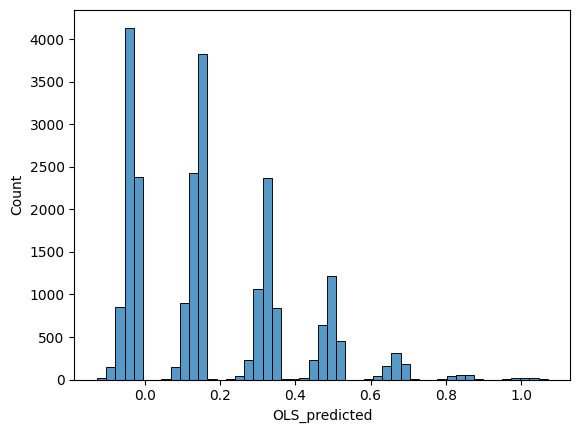

In [15]:
sns.histplot(data=df, x=df['OLS_predicted'])

Probit

In [16]:
from sklearn import preprocessing
import statsmodels.api as smf

In [17]:
probit_model=smf.Probit(y_train,X_train)
result=probit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.312780
         Iterations 7
                              Probit Regression Results                              
Dep. Variable:     cb_person_default_on_file   No. Observations:                22886
Model:                                Probit   Df Residuals:                    22874
Method:                                  MLE   Df Model:                           11
Date:                       Wed, 12 Jun 2024   Pseudo R-squ.:                  0.3354
Time:                               14:03:54   Log-Likelihood:                -7158.3
converged:                              True   LL-Null:                       -10771.
Covariance Type:                   nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

RandomForestClassifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [19]:
#X_train, y_train = make_classification(n_samples=19221, n_features=12,
                           #n_informative=2, n_redundant=0,
                           #random_state=0, shuffle=False)
                        
clf_RFC = RandomForestClassifier(max_depth=4, random_state=2)
clf_RFC.fit(X_train, y_train)
clf_RFC.score(X_test, y_test)

0.8313630041724618

GradientBoostingClassifier

In [20]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

In [21]:
clf_GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf_GBC.fit(X_train, y_train)
clf_GBC.score(X_test, y_test)

0.8256258692628651

SVM

In [22]:
from sklearn.svm import SVC

In [23]:
clf_SVM = SVC(kernel='linear', C=0.1, random_state=0)
clf_SVM.fit(X_train, y_train)
score_SVM = clf_SVM.score(X_test, y_test)
print("Score SVM:", score_SVM)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample DataFrame creation
data = {
    'Date': pd.date_range(start='2023-01-01', periods=180, freq='D'),
    'Date_YYYY_MM': pd.date_range(start='2023-01-01', periods=180, freq='D').to_period('M').astype(str),
    'Taux': np.random.uniform(1.0, 5.0, 180),
}
df = pd.DataFrame(data)
df['Taux_moyen_mensuel'] = df.groupby('Date_YYYY_MM')['Taux'].transform('mean')
df['Ecart_a_la_moyenne_mensuelle'] = df['Taux'] - df['Taux_moyen_mensuel']

# Display DataFrame to the user
import ace_tools as tools; tools.display_dataframe_to_user(name="DataFrame des taux de prêts habitats", dataframe=df)

# Plot 1: Taux appliqué par date
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Taux'], label='Taux appliqué', color='b')
plt.title('Évolution des taux appliqués sur six mois')
plt.xlabel('Date')
plt.ylabel('Taux appliqué')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Taux moyen mensuel
monthly_avg = df.groupby('Date_YYYY_MM')['Taux_moyen_mensuel'].mean()
plt.figure(figsize=(14, 7))
monthly_avg.plot(kind='bar', color='orange')
plt.title('Taux moyen mensuel')
plt.xlabel('Mois')
plt.ylabel('Taux moyen')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot 3: Écart à la moyenne mensuelle
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Ecart_a_la_moyenne_mensuelle'], label='Écart à la moyenne mensuelle', color='r')
plt.title('Écart à la moyenne mensuelle des taux appliqués')
plt.xlabel('Date')
plt.ylabel('Écart à la moyenne')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Correcting the error and plotting the combined graph again
fig, ax1 = plt.subplots(figsize=(14, 7))

# Taux moyen mensuel
color = 'tab:blue'
ax1.set_xlabel('Mois')
ax1.set_ylabel('Taux moyen mensuel', color=color)
monthly_avg.plot(kind='bar', ax=ax1, color=color, position=1, width=0.4)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(monthly_avg.index, rotation=45)

# Écart à la moyenne mensuelle
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Écart à la moyenne mensuelle', color=color)
monthly_deviation = df.groupby('Date_YYYY_MM')['Ecart_a_la_moyenne_mensuelle'].mean()
ax2.plot(monthly_deviation.index, monthly_deviation.values, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # to ensure the right y-label is not slightly clipped
plt.title('Taux moyen mensuel et Écart à la moyenne mensuelle')
plt.grid(True)
plt.show()